In [34]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pdb
from pathlib import Path

In [37]:
PATH = Path('camera_cal/')
# list(PATH.iterdir())

In [38]:
# Number of corners in chessboard pic
n_cols = 9
n_rows = 6 # ny
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((n_cols*n_rows,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

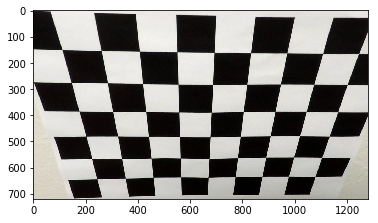

In [39]:
for filename in list(PATH.iterdir()):
    img = plt.imread(filename)
    if img is None:
        print('ERROR')
        pdb.set_trace()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (n_cols, n_rows), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        img = cv2.drawChessboardCorners(img, (n_cols, n_rows), corners, ret)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


filename = list(PATH.iterdir())[11]
img = plt.imread(filename)
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

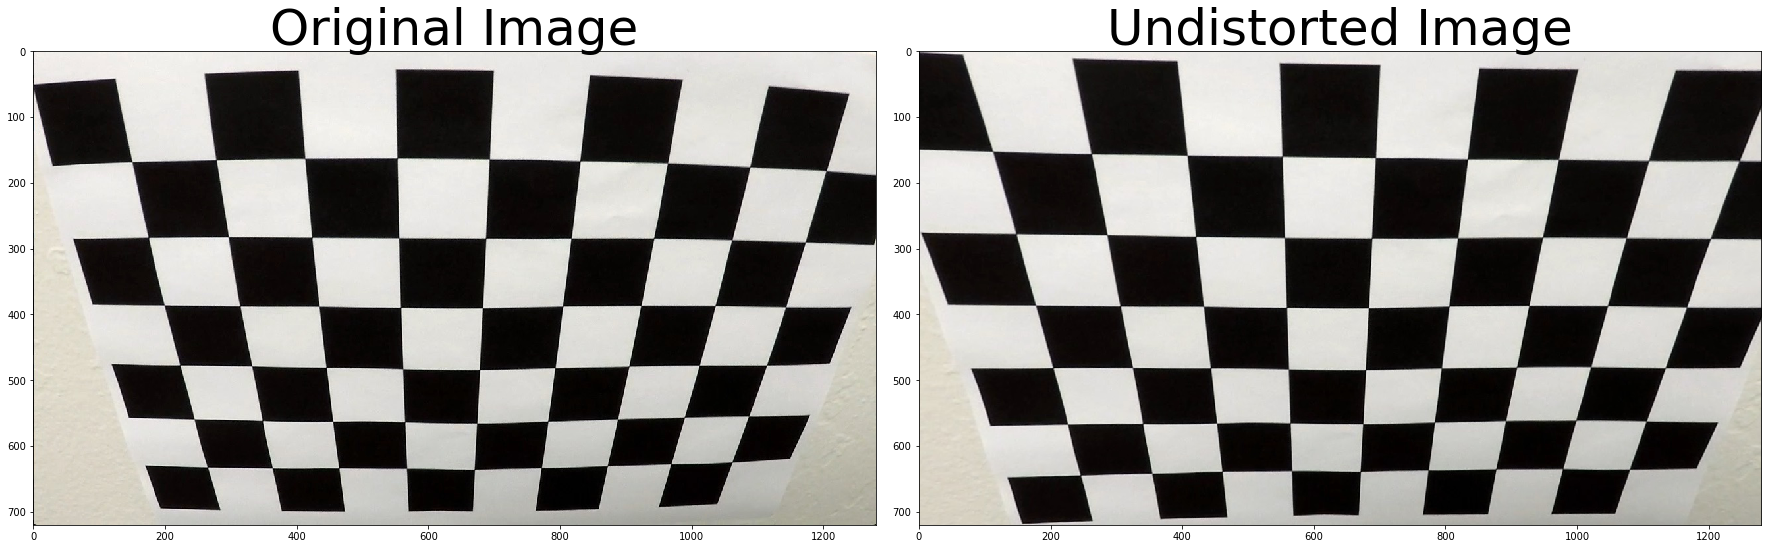

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

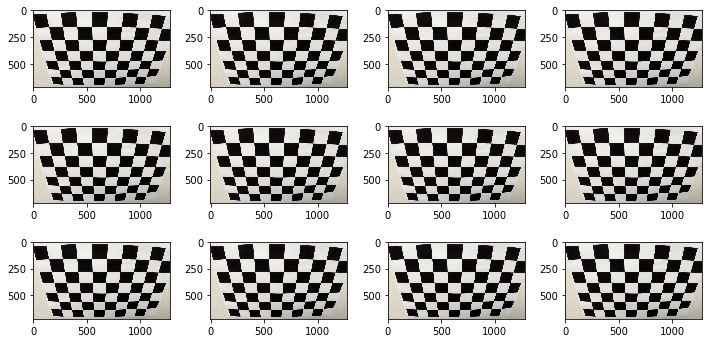

In [44]:
fig,axes=plt.subplots(3, 4, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(img)
plt.tight_layout()